# 0X01 Génération des parties

In [1]:
import numpy as np


In [2]:
coups = []
for i in range(1, 7):
    for j in range(i + 1, 7):
        coups.append({i, j})


In [3]:
def gen_single():
    """
    生成单次对局
    """
    # Initialisation
    liste = [np.random.choice(range(15))]
    i = liste[-1]
    # La suite
    while i != 30:
        interdite = restriction(liste)  # Générer les coups interdite selon la règle
        possible = list(set(range(15)) - interdite)

        if possible != []:
            i = np.random.choice(possible)
        else:
            i = 30

        liste.append(i)
    liste.extend(list(np.zeros(14 - len(liste))))
    return liste


def restriction(liste):
    """
    Donner les coups interdit selon les lignes déjà traitées(conservée dans liste)
    指出哪些线是不能画的
    """
    interdite = liste.copy()
    for i in liste:
        # 遍历已经画过的线
        points = set(range(1, 7))
        points = points - coups[i]
        for j in points:
            # 遍历和线i相连的其他线
            x, y = list(coups[i])
            m, n = list(set([x, j]))
            linenomx = -0.5 * m ** 2 + 5.5 * m + n - 7  # 顶点j对应的一根连线的编号
            m, n = list(set([y, j]))
            linenomy = -0.5 * m ** 2 + 5.5 * m + n - 7  # 另一根与j连线的编号
            if linenomx in liste:  # 如果相连的其他线也在liste中，那么就可以找到对应三角形的第三边
                interdite.append(linenomy)
            elif linenomy in liste:
                interdite.append(linenomx)
    return set(interdite)


In [4]:
data = np.array([gen_single() for i in range(1000)]).astype(int)
data


array([[ 8, 13,  9, ...,  0,  0,  0],
       [ 0, 12,  1, ...,  0,  0,  0],
       [ 0,  6, 13, ...,  0,  0,  0],
       ...,
       [ 4,  8,  5, ...,  0,  0,  0],
       [ 8,  7,  0, ...,  0,  0,  0],
       [ 5,  6,  7, ...,  0,  0,  0]])

考虑把对局可视化的代码写一下

# 1x01 Première analyse 

In [5]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [6]:
pca = PCA(n_components=3)  # On se limite aux trois premiers axes
A1 = data
res1 = pca.fit(A1)


In [7]:
res1.components_  # 导出两个主特征向量



array([[-9.86756911e-03,  3.49918752e-05,  6.92342442e-03,
         2.36915097e-03,  1.93999025e-02, -4.47817152e-03,
         2.28969728e-03, -5.47533477e-01,  4.15191285e-02,
         8.35422458e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00],
       [ 1.18770802e-02, -2.06051933e-02, -4.38083639e-03,
         5.75292102e-03, -2.57525834e-03,  5.54790013e-03,
        -1.10459793e-03, -4.52406471e-01,  8.25182342e-01,
        -3.37262404e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00, -0.00000000e+00],
       [ 3.83602172e-02, -2.11901407e-01, -1.77101175e-01,
         3.14342283e-02,  1.12122102e-02,  8.91948922e-01,
        -1.87964161e-01, -2.09460187e-01, -1.77739873e-01,
        -1.21569731e-01, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00]])

尝试解读一下这些向量

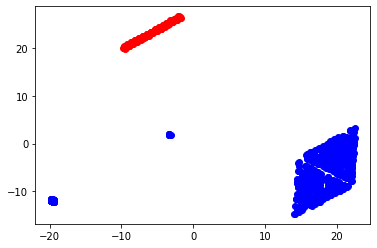

In [8]:
XX = res1.transform(A1)

n, p = A1.shape
for i in range(n):
    if (np.where(A1[i] == 30)[-1] % 2) == 0:
        plt.scatter(XX[i, 0], XX[i, 1], color="r")  # 红点先手胜
    else:
        plt.scatter(XX[i, 0], XX[i, 1], color="b")  # 蓝点后手胜


# 1x02 Analyse discriminante

In [9]:
A_Gagne = []
B_Gagne = []
gagneur = []

for i in range(n):
    if (np.where(A1[i] == 30)[0] % 2) == 0:
        A_Gagne.append(list(A1[i]))
        gagneur.append(2)
    else:
        B_Gagne.append(list(A1[i]))
        gagneur.append(1)
A_Gagne = np.array(A_Gagne)
B_Gagne = np.array(B_Gagne)

In [10]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as lda

In [11]:
my_lda = lda(n_components=1) # 这里不让我n_components大于1（就是主平面只有1维），暂时不知道问题出在哪
res = my_lda.fit(A1, gagneur)
X = res.transform(A1)            # Une projection ? Laquelle ??

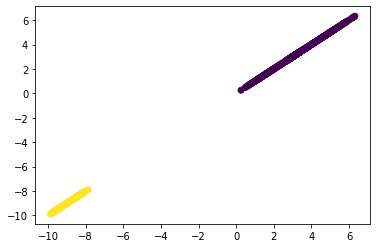

In [12]:
plt.scatter(X[:, 0], X[:, 0], c=gagneur)
#for i in range(len(a)):
#    plt.text(X[i, 0], X[i, 1], s=Noms[i])

# 2x01 Construction de fonction d'évaluation

In [13]:
def choix():
    no = 0
    return no
